In [2]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline
np.random.seed(1)

# Loading the dataset

In [3]:
X, Y = load_planar_dataset()

## Visualizing dataset

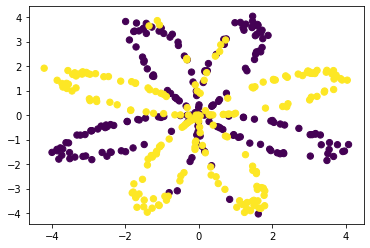

In [6]:
plt.scatter(X[0,:],X[1,:], c=Y, s=40)

In [9]:
shape_X = X.shape
shape_Y = Y.shape
m = X.size/shape_X[0]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


## Logistic regression on the dataset

In [10]:
clf = sklearn.linear_model.LogisticRegressionCV().fit(X.T, Y.T)

g:\ml_env\env\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Plotting the decision boundary of the classifier

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


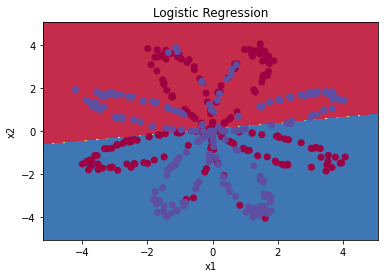

In [11]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Since the dataset is not linearly separable, logistic regression doesn't perform well. We will train a simple NN with one hidden layer and evaluate performance. We will have the logistic regression model as our baseline.

# Defining the NN structure

In [14]:
def layer_sizes(X, Y):
  """
  Arguments:
  X -- input dataset of shape (input size, number of examples)
  Y -- labels of shape (output size, number of examples)
  
  Returns:
  n_x -- the size of the input layer
  n_h -- the size of the hidden layer
  n_y -- the size of the output layer
  """
  n_x = X.shape[0]
  n_h = 4
  n_y = Y.shape[0]

  return n_x, n_h, n_y

In [15]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


## Initialize model parameters

In [19]:
def initialize_parameters(n_x, n_h, n_y):
  """
  Argument:
  n_x -- size of the input layer
  n_h -- size of the hidden layer
  n_y -- size of the output layer
  
  Returns:
  params -- python dictionary containing your parameters:
                  W1 -- weight matrix of shape (n_h, n_x)
                  b1 -- bias vector of shape (n_h, 1)
                  W2 -- weight matrix of shape (n_y, n_h)
                  b2 -- bias vector of shape (n_y, 1)
  """
  np.random.seed(2)
  W1 = np.random.randn(n_h, n_x)*0.01
  b1 = np.zeros((n_h, 1))
  W2 = np.random.randn(n_y, n_h)*0.01
  b2 = np.zeros((n_y, 1))

  assert (W1.shape == (n_h, n_x))
  assert (b1.shape == (n_h, 1))
  assert (W2.shape == (n_y, n_h))
  assert (b2.shape == (n_y, 1))
  
  parameters = {"W1": W1,
                "b1": b1,
                "W2": W2,
                "b2": b2}
    
  return parameters





In [20]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]
